# **F1 Drivers Dataset**

En esta base de datos vamos a analizar la carrera de todos los pilotos de la F1.

In [1]:
!pip install fitter
!pip install scikit-posthocs


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_1samp, kruskal
from statsmodels.discrete.count_model import ZeroInflatedPoisson
import numpy as np
from fitter import Fitter
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import math
import scikit_posthocs as sp

In [3]:
df = pd.read_csv('F1Drivers_Dataset.csv')

#  1 Elección de datos y breve descripción de su naturaleza.

## 1.1 Información de la base de datos



In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              868 non-null    object 
 1   Nationality         868 non-null    object 
 2   Seasons             868 non-null    object 
 3   Championships       868 non-null    float64
 4   Race_Entries        868 non-null    float64
 5   Race_Starts         868 non-null    float64
 6   Pole_Positions      868 non-null    float64
 7   Race_Wins           868 non-null    float64
 8   Podiums             868 non-null    float64
 9   Fastest_Laps        868 non-null    float64
 10  Points              868 non-null    float64
 11  Active              868 non-null    bool   
 12  Championship Years  34 non-null     object 
 13  Decade              868 non-null    int64  
 14  Pole_Rate           868 non-null    float64
 15  Start_Rate          868 non-null    float64
 16  Win_Rate

In [5]:
df.describe()

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,0.084101,29.917051,27.694700,1.244240,1.247696,3.756912,1.261521,55.849459,1972.223502,0.011471,0.779824,0.011050,0.041389,0.011894,0.479158,3.664747
std,0.524883,53.780150,52.876476,6.347512,6.491921,14.432826,5.413644,265.968614,20.201084,0.046544,0.324303,0.043579,0.106457,0.043514,1.213826,3.501761
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,0.962251,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,29.250000,26.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1982.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.382517,5.000000
max,7.000000,359.000000,356.000000,103.000000,103.000000,191.000000,77.000000,4415.500000,2020.000000,0.557692,1.000000,0.461538,1.000000,0.500000,14.197749,19.000000


In [6]:
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


## 1.2 Naturaleza de los datos

Como podemos observar casi todas las variables son cuantitativas pero hay algunas categoricas.

Como variables categoricas podemos observar:


*   driver --> nominativa
*   Champion --> ordinal

Y como variables cuantitativas tenemos:


*   Championships --> discreta
*   Pole_Rate --> continua





<Axes: xlabel='Nationality', ylabel='Championships'>

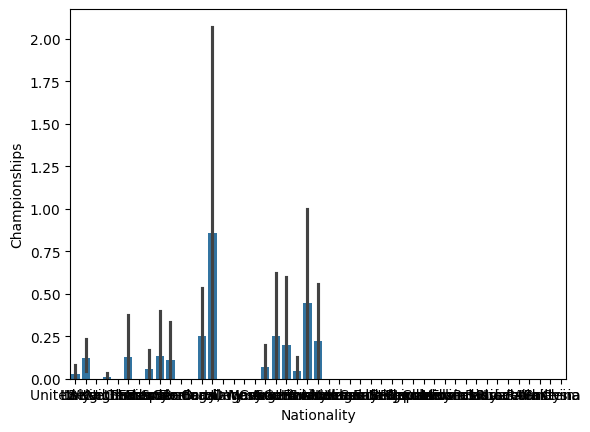

In [7]:
sns.barplot(x='Nationality', y='Championships', data=df)

Como podemos observar es una gráfica poco significativa dada la gran variabilidad de nacionalidades. Por tanto vamos a filtrar por los paises que tengan mas de 0 championships.

In [8]:
paises_campeonatos = df[df['Championships'] > 0].groupby("Nationality", as_index=False)["Championships"].sum()
paises_campeonatos

,Nationality,Championships
0,Argentina,5.0
1,Australia,4.0
2,Austria,4.0
3,Brazil,8.0
4,Canada,1.0
5,Finland,4.0
6,France,4.0
7,Germany,12.0
8,Italy,3.0
9,Netherlands,2.0


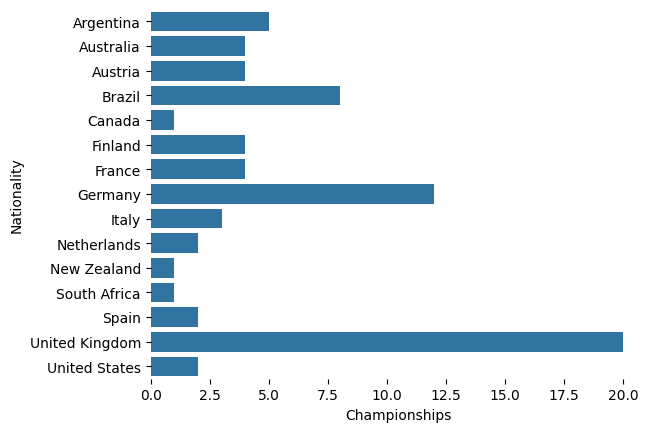

In [9]:
sns.barplot(x='Championships', y='Nationality', data=paises_campeonatos)
sns.despine(left=True, bottom=True)

Como podemos observar hay una gran diferencia entre los campeonatos ganados por pilotos de United Kingdom respecto a los demás paises. Es un resultado esperado ya que es el pais donde se originó este deporte y hay una cultura muy fuerte en este país.

## 1.3 Preguntas curiosas.

### 1.3.1 Acabás de entrar en la F1 ¿Cuántas posibilidades tienes de ganar una carrera a lo largo de tu carrera deportiva?

In [10]:
round(df[df["Race_Wins"]>0].shape[0]/df.shape[0]*100,2)

13.02

Tienes un 13.02% de ganar una carrera a lo largo de tu carrera.

### 1.3.2 ¿Y de ganar un mundial?

In [11]:
round(df[df["Championships"]>0].shape[0]/df.shape[0]*100,2)

3.92

Casi un 4% de la gente que llega a la F1 es capaz de ganar al menos un mundial.

### 1.3.3 ¿Quién es el piloto que tiene el mayor ratio de campeonatos respecto a años en activo?

In [12]:
df["rate_championships"] = df["Championships"]/df["Years_Active"]
df.loc[df["rate_championships"].idxmax()]

Driver                                              Juan Manuel Fangio
Nationality                                                  Argentina
Seasons               [1950, 1951, 1953, 1954, 1955, 1956, 1957, 1958]
Championships                                                      5.0
Race_Entries                                                      52.0
Race_Starts                                                       51.0
Pole_Positions                                                    29.0
Race_Wins                                                         24.0
Podiums                                                           35.0
Fastest_Laps                                                      23.0
Points                                                           245.0
Active                                                           False
Championship Years                      [1951, 1954, 1955, 1956, 1957]
Decade                                                            1950
Pole_R

Juan Manuel Fangio ha sido el que más ratio tiene. Sorprendentemente superando a Lewis Hamilton.

# 2 Descriptiva univariante y bivariante.

<Axes: >

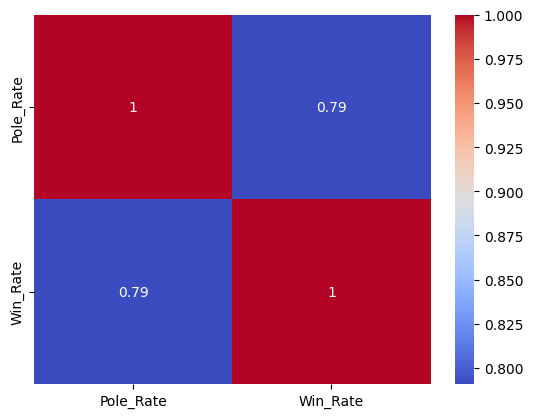

In [13]:
aux = df[['Pole_Rate','Win_Rate']]
sns.heatmap(aux.corr(), annot=True,cmap="coolwarm")

<Axes: xlabel='Pole_Rate', ylabel='Win_Rate'>

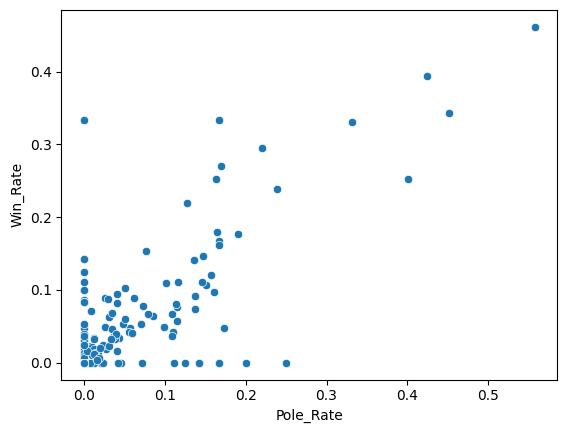

In [14]:
sns.scatterplot(x='Pole_Rate', y='Win_Rate', data=df)

Como podemos observar si que hay una gran correlación entre hacer la pole y ganar la carrera. Y en el gráfico de abajo vemos que al no hacer pole, hay muy poca posibilidad de victoria.

<Axes: xlabel='Race_Starts', ylabel='Race_Wins'>

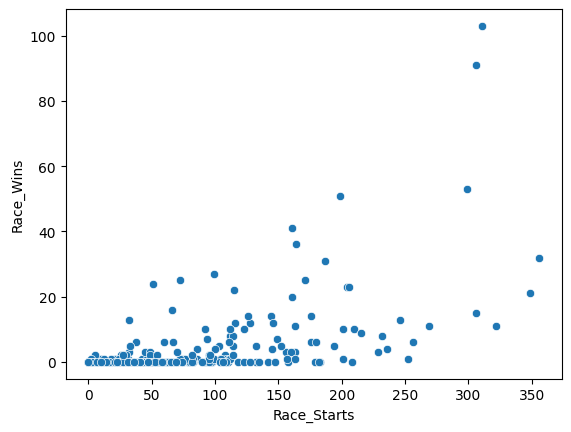

In [15]:
sns.scatterplot(x='Race_Starts', y='Race_Wins', data=df)

# 3 Comprobación de la normalidad de algunas variables.

## 3.1 Normalidad en tres variables del dataset.

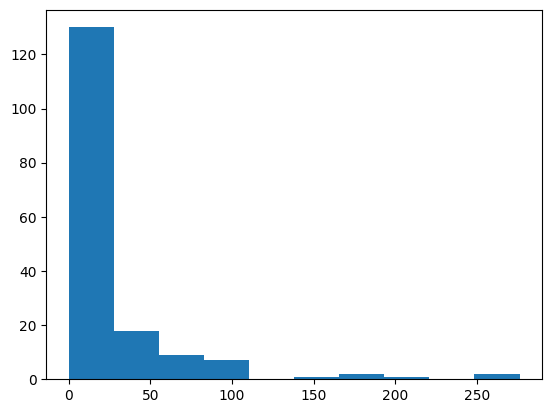

<Axes: xlabel='Points_per_season'>

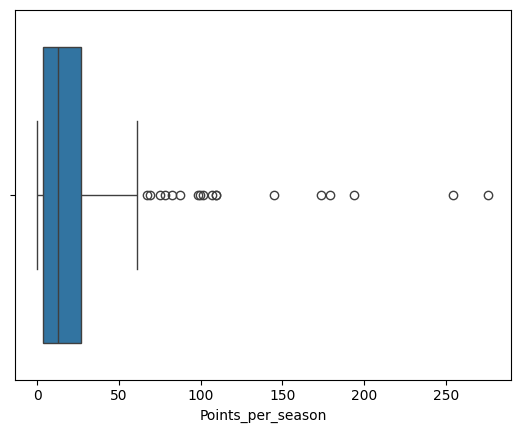

In [16]:
df["Points_per_season"] = df["Points"]/df["Years_Active"]
nueva_data = df[(df["Race_Starts"]) > 40]
fig, ax = plt.subplots()
plt.hist(nueva_data["Points_per_season"])
plt.show()
sns.boxplot(x='Points_per_season', data=nueva_data)

No podemos apreciar normalidad en cuanto a los puntos por temporada de los pilotos.

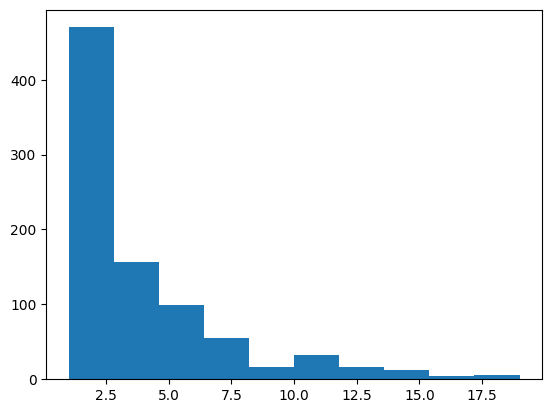

<Axes: xlabel='Years_Active'>

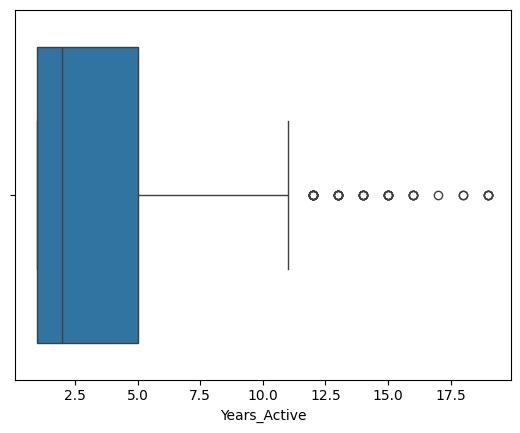

In [17]:
fig, ax = plt.subplots()
plt.hist(df["Years_Active"])
plt.show()
sns.boxplot(x='Years_Active', data=df)

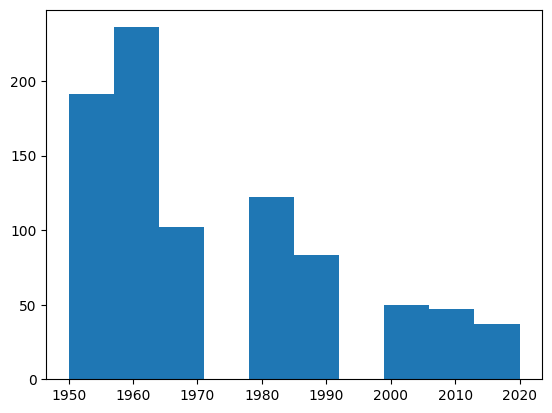

<Axes: xlabel='Decade'>

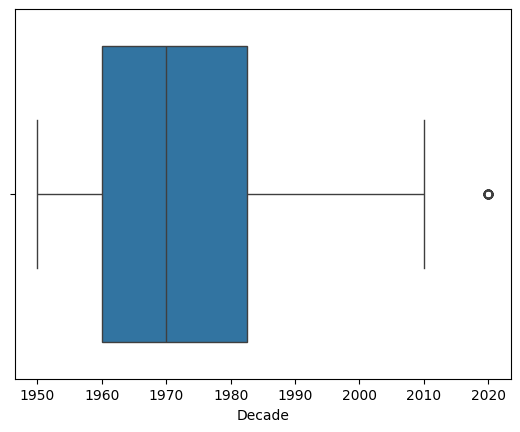

In [18]:
fig, ax = plt.subplots()
plt.hist(df["Decade"])
plt.show()
sns.boxplot(x='Decade', data=df)

C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_8560\385634965.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.columns.values[4:6]], shade=True)


<Axes: ylabel='Density'>

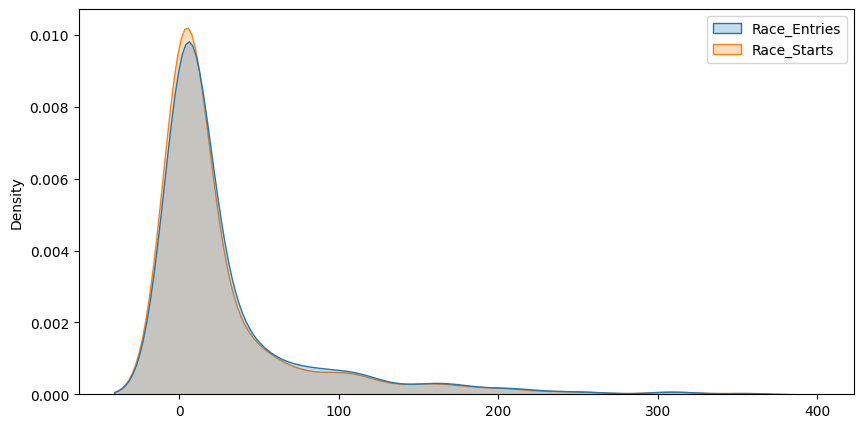

In [19]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df[df.columns.values[4:6]], shade=True)

## 3.2 Distribución que sigue la variable "Years_Active".

Como ninguna de las tres variables estudiadas sigue una distribución normal. Vamos a ver que distribución es la que más se parece la de 'Years_Active':

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,2.851873,923.238035,937.536611,inf,0.339861,5.674006e-90
beta,3.219888,803.873803,822.938570,inf,0.339862,5.670921e-90
expon,4.326092,875.508171,885.040554,inf,0.339862,5.670439e-90
norm,5.085454,986.428327,995.960710,inf,0.232005,1.452637e-41


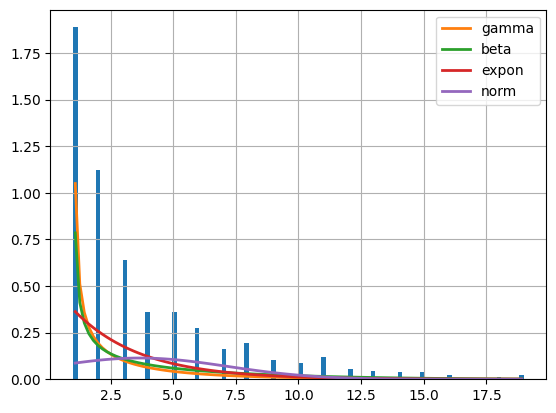

In [20]:
f = Fitter(df["Years_Active"], distributions=["norm","expon","gamma","beta"])
f.fit()
f.summary()

# 4 Estimación puntual y por intervalos

## 4.1 Estimación puntual

Mediante la estimación puntual vamos a comparar la media poblacional (μ) con varias medias muestrales (x) y extraer conclusiones.



In [21]:
#Sacamos la media de años activo de toda la población

media_año_activo = df['Years_Active'].mean()
desviacion_pob = df['Years_Active'].std()

print (f' μ = {media_año_activo}')
print (f' σ ={desviacion_pob}')


#Sacamos la media de años activo de 10,50,100,200 pilotos (cogemos la misma semilla para comparar si añadiendo más pilotos se asemeja más a la media poblacional)

datos_10 = df['Years_Active'].sample(n=10, random_state=42)
print (f' x de 10 datos {datos_10.mean()}')

datos_50 = df['Years_Active'].sample(n=50, random_state=42)
print (f' x de 50 datos {datos_50.mean()}')

datos_100 = df['Years_Active'].sample(n=100, random_state=42)
print (f' x de 100 datos {datos_100.mean()}')

datos_200 = df['Years_Active'].sample(n=200, random_state=42)
print (f' x de 200 datos {datos_200.mean()}')







 μ = 3.664746543778802
 σ =3.5017611723581132
 x de 10 datos 2.3
 x de 50 datos 3.4
 x de 100 datos 3.63
 x de 200 datos 3.665


Como nos indican los resultados en nuestra población de pilotos se necesitaría una muestra de al menos n>50, ya que para n = 10 la media poblacional difiere en 1.33 años. En cambio con n = 50 solo difiere en un 0,26.

Otra conclusión que podemos sacar, es que se necesitán una muestra grande de datos para poder aproximarnos a la media de la población. Nuestra población es de 800 datos y hemos necesitado al menos 50 para aproximarnos a la media poblacional. Esto se debe a que la población tiene una gran cantidad de outliers que desplazan la media de años en activo hacia la derecha.

## 4.2 Estimación por intervalos

Como hemos visto en el punto 3.2 nuestra población no sigue una distrubición normal, así que vamos a utiliar la teoría de que la distribución de muchas medias muestrales sigue una distribución normal.

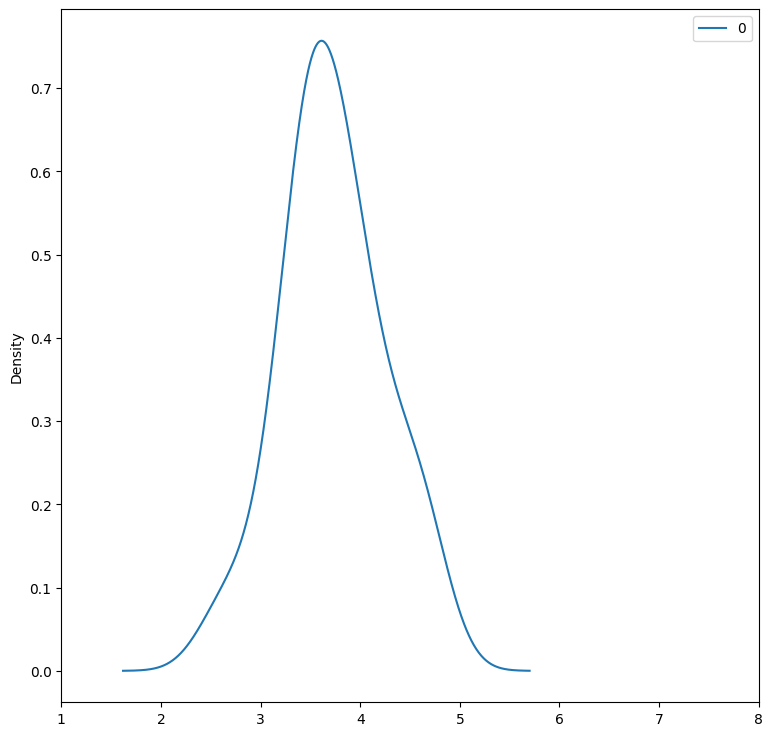

In [22]:
puntos_estimados = []

for x in range(20):         # Generamos 20 muestras
    sample = np.random.choice(df['Years_Active'], size=50)
    puntos_estimados.append( sample.mean() )

puntos_estimados_df = pd.DataFrame(puntos_estimados)

pd.DataFrame(puntos_estimados).plot(kind="density",
                                   figsize=(9,9),
                                   xlim=(1,8));

In [23]:
print (puntos_estimados_df.mean())

0    3.73
dtype: float64


Como se observa la distribución muestral sigue una distrubición más o menos normal.También se observa que la media de la distribución muestral se asemeja a la media poblacional.

3, 642 respecto a μ = 3.664746543778802




Ahora queremos tener un 95 % de posibilidades de capturar la media de la población real con una estimación puntual y un intervalo de confianza correspondiente, por tanto estableceriamos un nivel de confianza en 95 %. Lo vamos a calcular utilizando la desviación estandar de la población ya que es un dato conocido para nosotros.

In [24]:
z_critical = stats.norm.ppf(q = 0.975)  # Obtenemos z-critical value*

print("z-critical value:")              # Mostramos el z-critical value
print(z_critical)

desviacion_pob = df['Years_Active'].std()
sample = np.random.choice(df['Years_Active'], size=50)
media_years_active = sample.mean()

margin_of_error = z_critical * (desviacion_pob/math.sqrt(50))

confidence_interval = (media_years_active - margin_of_error,
                       media_years_active + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(2.389379159853936, 4.3306208401460635)


Este intervalo nos dice que, con un 95% de confianza, la media poblacional de Years_Active debe estar dentro de este rango para una muestra n = 50. Como conocemos que μ = 3.664746543778802 la afirmación es correcta.


# 5 Contrastes de hipótesis.

## 5.1 T test con una población

Vamos a realizar el contraste con una población. Vamos a ver si la media de campeonatos ganados es igual a uno.

### Hipótesis

$$
\left\{
  \begin{array}{ll}
    H_0 : \mu = \text{1} \quad & \text{(La media de campeonatos ganados es igual a uno).} \\
    H_1 : \mu \neq \text{1} \quad & \text{(La media de campeonatos ganados no es igual a uno).}
  \end{array}
\right.
$$

In [25]:
print(stats.ttest_1samp(a=df["Championships"],popmean=1))

sigma = df["Championships"].std()/math.sqrt(df.shape[0])
mu = df["Championships"].mean()

stats.t.interval(0.95, df.shape[0]-1, loc=mu, scale=sigma)

TtestResult(statistic=-51.40963923117422, pvalue=1.7279022097232772e-265, df=867)


(0.04913444165395423, 0.1190683233230043)

Tanto el p-valor como el intervalo nos indican que tenemos que rechazar H0.

Además, con el intervalo que nos proporciona el t.interval, podemos decir con un 95% de confianza, que los campeonatos ganados a lo largo de la trayecotria sera entre 0.038 y 0.13 (como los datos son dicretos, diremos que la media es 0).

Vamos a comprobarlo haciendo un contraste donde H0 será que la media es mayor que uno, y H1 es menor.

### Hipótesis

$$
\left\{
  \begin{array}{ll}
    H_0 : \mu \geq 1 & \text{(La media es mayor o igual a 1).} \\
    H_1 : \mu < 1 & \text{(La media es menor que 1).}
  \end{array}
\right.
$$

In [26]:
popmean=1
data = df["Championships"]
t_stat, p_value = ttest_1samp(data, popmean,alternative="less")

print(t_stat,p_value)

-51.40963923117422 8.639511048616386e-266


Como era de esperar con los datos obtenidos en el primer analisis, rechazaremos H0 y podemos decir con casi total seguridad que la media de un piloto será menor que uno.

## 5.2 T test con dos muestras

Ahora vamos a ver si la media de puntos de los pilotos de Argentina es igual a la media de puntos de los pilotos de España.

### Hipótesis

$$
\left\{
  \begin{array}{ll}
    H_0 : \mu_{\text{Argentina}} = \mu_{\text{España}} \quad & \text{(La media de puntos de los pilotos de Argentina es igual a la media de los pilotos de España).} \\
    H_1 : \mu_{\text{Argentina}} \neq \mu_{\text{España}} \quad & \text{(La media de puntos de los pilotos de Argentina no es igual a la media de los pilotos de España).}
  \end{array}
\right.
$$

In [27]:
pilotos_argentinos = df[df["Nationality"]=="Argentina"]["Points"]
pilotos_españoles = df[df["Nationality"]=="Spain"]["Points"]

# Veamos la igualdad de la varianza entre las dos muestras
levene_test = stats.levene(pilotos_argentinos, pilotos_españoles, center='median')
levene_test

LeveneResult(statistic=2.3145158749545627, pvalue=0.13644974151215358)

Como el p-valor es 0.13 podemos aceptar H0 y podemos asumir homocedasticidad.

In [28]:
stats.ttest_ind(pilotos_argentinos,pilotos_españoles,equal_var=True)

TtestResult(statistic=-1.5210170433759418, pvalue=0.13653390975827112, df=38.0)

El test muestra evidenias para aceptar la hipotesis de que los dos grupos tengan medias iguales, alrededor de un 86% de confianza.

# 6 Anova

## 6.1 Anova con los puntos y las nacionalidades de los pilotos.

Para realizar el ANOVA, primero debemos verificar si las poblaciones siguen una distribución normal. Es decir, debemos comprobar si los puntos obtenidos por los pilotos de cada país siguen una distribución normal.

Para ello, analizaremos los datos de los cinco países considerados más importantes, que además son los que han tenido un mayor número de pilotos.

C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_8560\2585860927.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Nationality"]==pais]["Points"], shade=True)
C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_8560\2585860927.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Nationality"]==pais]["Points"], shade=True)


C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_8560\2585860927.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Nationality"]==pais]["Points"], shade=True)
C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_8560\2585860927.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Nationality"]==pais]["Points"], shade=True)
C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_8560\2585860927.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["Nationality"]==pais]["Points"], shade=True)


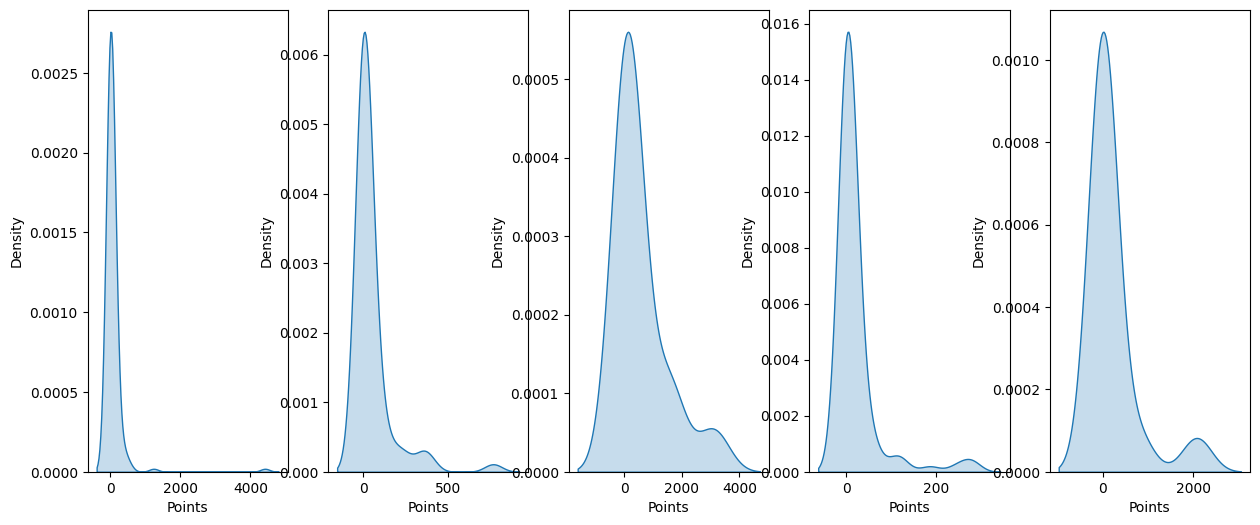

In [29]:
plt.figure(figsize=(15,6))

for i, pais in enumerate(["United Kingdom","France","Germany","Italy","Spain"]):
  plt.subplot(1,5,i+1)
  sns.kdeplot(data=df[df["Nationality"]==pais]["Points"], shade=True)

Como podemos observar, en ninguno de los casos se cumple la normalidad. Por lo tanto, tenemos dos opciones para proceder con nuestro análisis:

1.   Realizar el ANOVA, a pesar de no cumplirse los supuestos de normalidad.
2.   Utilizar el test de Kruskal-Wallis, que es una alternativa no paramétrica.



### 6.1.1 Suponemos normalidad.

Aunque sabemos que los puntos respecto a la Nacionalidad no se comportan como una distribución normal vamos a realizar el análisis igualmente.

Primero vamos a ver si aceptamos que las medias de puntos entre nacionalidades son iguales o hay diferencias.

### Hipótesis.

$$
\left\{
  \begin{array}{ll}
    H_0 : \text{Las medias de los grupos son iguales (no hay diferencias significativas entre las medias de los puntos de las nacionalidades).} \\
    H_1 : \text{Al menos una de las medias de los grupos es diferente.}
  \end{array}
\right.
$$


In [30]:
model = ols('Points ~ Nationality', data = df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                   sum_sq     df         F    PR(>F)
Nationality  7.051999e+06   46.0  2.318814  0.000003
Residual     5.427898e+07  821.0       NaN       NaN


Da igual el intervalo de confianza que escojamos (90%, 95% y 99%) ya que el p-valor es muy bajo y rechazariamos en todas las opciones.

Ahora vamos a ver en que nacionalidades difieren las medias. Con un intervalo de confianza del 95%.

group1,group2,meandiff,p-adj,lower,upper,reject
Argentina,Australia,130.6366,1.0,-185.6594,446.9325,False
Argentina,Austria,35.89,1.0,-291.6976,363.4777,False
Argentina,Belgium,-9.239,1.0,-304.8716,286.3936,False
Argentina,Belgium France,-20.8912,1.0,-1064.3668,1022.5844,False
Argentina,Brazil,80.8276,1.0,-192.2953,353.9504,False
Argentina,Canada,10.5755,1.0,-323.6042,344.7551,False
Argentina,Chile,-22.8912,1.0,-1066.3668,1020.5844,False
Argentina,China,-19.8912,1.0,-1063.3668,1023.5844,False
Argentina,Colombia,76.4421,1.0,-548.7507,701.635,False
Argentina,Czech Republic,-25.8912,1.0,-1069.3668,1017.5844,False


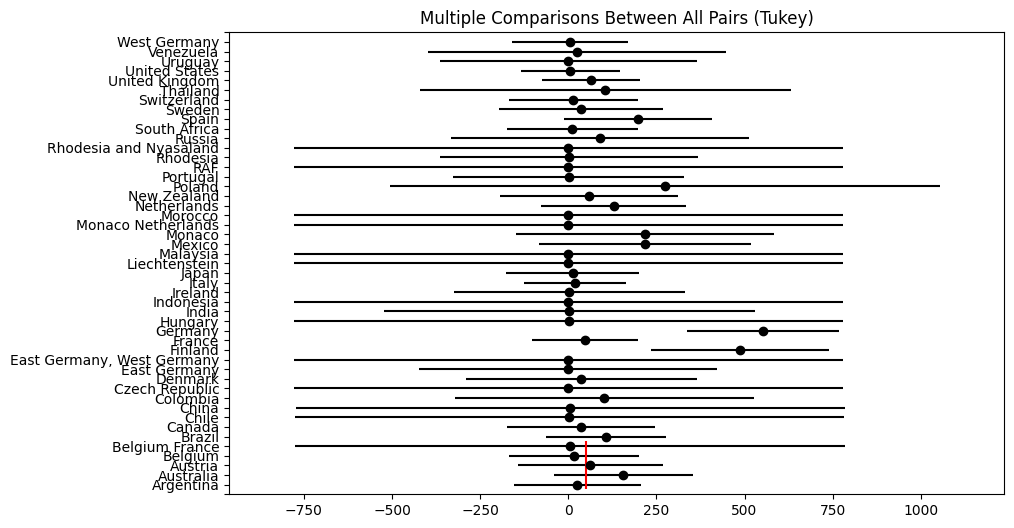

In [31]:
tukey = pairwise_tukeyhsd(endog=df['Points'], groups=df['Nationality'], alpha=0.05)

tukey.plot_simultaneous()
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()

Nos hemos dado cuenta que al tener muchos paises y pocas muestras de algunos. Salen resultados poco fiables. Por tanto, vamos a seleccionar los cinco paises con más pilotos y más importantes dentro de la F1.

In [32]:
paises_importantes = df[df["Nationality"].isin(["United Kingdom","France","Germany","Italy","Spain"])]
model = ols('Points ~ Nationality', data = paises_importantes).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                   sum_sq     df         F        PR(>F)
Nationality  3.783752e+06    4.0  8.878508  7.598414e-07
Residual     3.824874e+07  359.0       NaN           NaN


Como en el caso anterior, el p-valor es muy pequeño para los intervalos de confianza. Por tanto, rechazamos H0 y podemos decir que las medias no son iguales.

group1,group2,meandiff,p-adj,lower,upper,reject
France,Germany,504.7355,0.0,243.3394,766.1317,True
France,Italy,-27.6348,0.9823,-166.2448,110.9751,False
France,Spain,149.1046,0.4923,-104.892,403.1012,False
France,United Kingdom,16.6236,0.9964,-109.8932,143.1403,False
Germany,Italy,-532.3703,0.0,-787.8979,-276.8428,True
Germany,Spain,-355.631,0.0293,-688.1906,-23.0713,True
Germany,United Kingdom,-488.112,0.0,-737.2868,-238.9371,True
Italy,Spain,176.7394,0.2908,-71.2136,424.6924,False
Italy,United Kingdom,44.2584,0.8242,-69.6403,158.157,False
Spain,United Kingdom,-132.481,0.5601,-373.8821,108.92,False


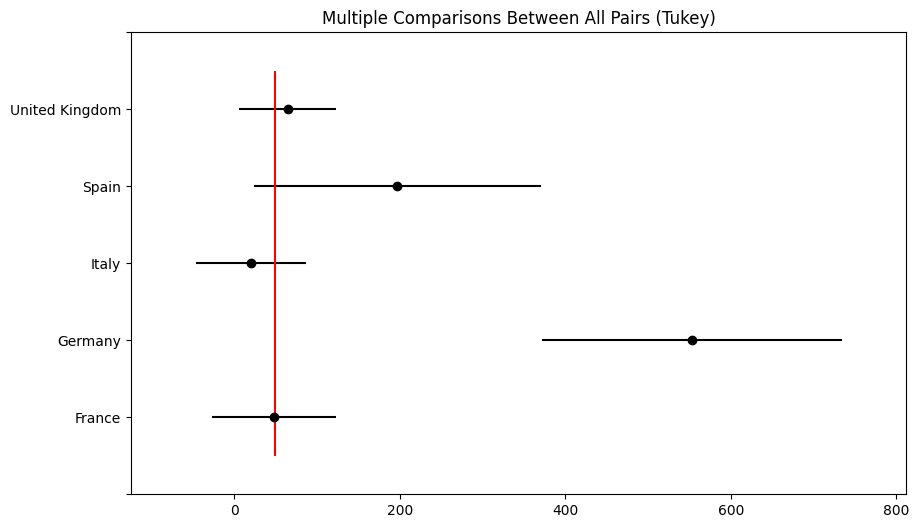

In [33]:
tukey = pairwise_tukeyhsd(endog=paises_importantes['Points'], groups=paises_importantes['Nationality'], alpha=0.05)

tukey.plot_simultaneous()
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()

Podemos afirmar con un intervalo de confianza al 95% que las medias de alemania respecto al resto de paises son distintas. Mientras que, entre los demás paises podemos decir que las medias se comportan igual.

Con la gráfica podemos ver de forma visual la diferencia ente los paises.

### 6.1.2 Krusal-Wallis

Procedemos a realizar la alternativa no paramétrica al anova de los cinco paises que hemos usado en el anterior apartado.

#### **Hipótesis**:

$$
\left\{
  \begin{array}{ll}
    H_0 : \text{No hay diferencias significativas entre las distribuciones de los puntos de los grupos (nacionalidades).} \\
    H_1 : \text{Al menos uno de los grupos tiene una distribución diferente de los demás.}
  \end{array}
\right.
$$


In [34]:
uk = df[df["Nationality"] == "United Kingdom"]["Points"]
france = df[df["Nationality"] == "France"]["Points"]
germany = df[df["Nationality"] == "Germany"]["Points"]
italy = df[df["Nationality"] == "Italy"]["Points"]
spain = df[df["Nationality"] == "Spain"]["Points"]

stat, p = kruskal(uk, france, germany, italy, spain)

print(f"Estadístico de Kruskal-Wallis: {stat}")
print(f"p-valor: {p}")

Estadístico de Kruskal-Wallis: 19.207454118802474
p-valor: 0.0007155053292512625


Al tener un valor alto de H, las diferencias entre los rangos de los grupos son grandes. Y con el p-valor tan pequeño, podemos decir que rechazamos la hipotesis H0. Es decir, hay diferencias significativas entre los grupos.

In [35]:
posthoc = sp.posthoc_dunn(paises_importantes, val_col='Points', group_col='Nationality',p_adjust='bonferroni')
posthoc

,France,Germany,Italy,Spain,United Kingdom
France,1.000000,0.018958,1.000000,1.000000,0.711689
Germany,0.018958,1.000000,0.004178,0.214146,0.000298
Italy,1.000000,0.004178,1.000000,1.000000,1.000000
Spain,1.000000,0.214146,1.000000,1.000000,1.000000
United Kingdom,0.711689,0.000298,1.000000,1.000000,1.000000


C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_8560\2589596600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=paises_importantes, x="Nationality", y="Points", palette="Set2")


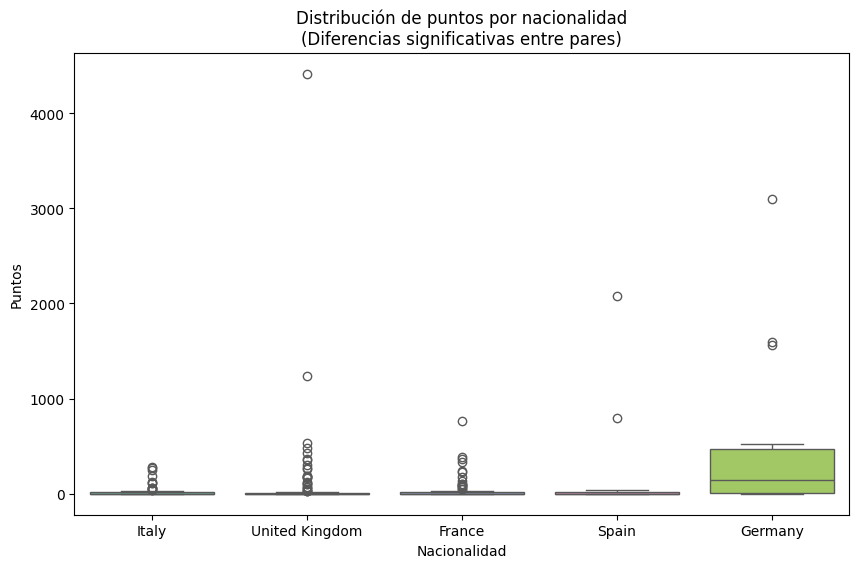

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=paises_importantes, x="Nationality", y="Points", palette="Set2")
plt.title("Distribución de puntos por nacionalidad\n(Diferencias significativas entre pares)")
plt.ylabel("Puntos")
plt.xlabel("Nacionalidad")

# Opcional: Añade anotaciones manuales si lo necesitas para destacar pares significativos.
plt.show()

Con este gráfico, podemos concluir que hay diferencias significativas entre Alemania y los otros grupos menos con España.

Todos los demás pares no presentan diferencias significativas.

# 7 Conclusión

Como tenemos muy pocos datos y muchos de los pilotos han estado muy poco tiempo y tienen muy pocos puntos, ha empeorado la calidad de nuestros resultados y gráficas.

No obstante, hemos podido sacar cosas interesantes, como la media de campeonatos es mucho menor que uno, que si que hay relación entre la pole y ganar la carrera, hemos visto el piloto con mejor ratio de campeonatos...

Con esta practica, adquirimos habilidad y confianza para analizar cualquier base de datos de forma eficaz y visulamente clara.

